In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing master files
master = pd.read_excel('Master_File_UNGKM.xlsx',sheet_name="2A03")
master1 = pd.read_excel('Master_File_UNGKM.xlsx',sheet_name="2А27") 
master2 = pd.read_excel('Master_File_UNGKM.xlsx',sheet_name="2А24") 
master3 = pd.read_excel('Master_File_UNGKM.xlsx',sheet_name="2А28") 
master4 = pd.read_excel('Master_File_UNGKM.xlsx',sheet_name="4А16") 
master5 = pd.read_excel('Master_File_UNGKM.xlsx',sheet_name="4А23") 
master6 = pd.read_excel('Master_File_UNGKM.xlsx',sheet_name="5А10") 
master7 = pd.read_excel('Master_File_UNGKM.xlsx',sheet_name="5А15") 
master8 = pd.read_excel('Master_File_UNGKM.xlsx',sheet_name="5А16") 
master9 = pd.read_excel('Master_File_UNGKM.xlsx',sheet_name="2А27 1БИС") 

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [3]:
report = pd.read_excel('Report_2A03.xlsm',sheet_name='Детализация',header=4)
#otchot = otchot.iloc[2:12,:19]

In [4]:
#Section - 5
#Depth - 12
#Accumulated time - 13
#Time - 17
#Operation type - 19
#Time type - 27

In [15]:
def master_processing(data, well):
    data1 = data.iloc[:,[5,12,13,17,26,27]]
    data1 = data1.loc[data['№ скв'] == well]
    data1.columns = ['Section','Depth','Acc_time','Time','Penetration','Operation']
    return data1

In [6]:
def plot_well(data):
    plt.style.use('seaborn')
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    ax.set_title('Depth vs Accumulated time')
    ax.set_xlabel('Accumulated time, days')
    ax.set_ylabel('Depth, m')
    ax.plot(data.Acc_time, data.Depth)
    ax.invert_yaxis()

In [21]:
well1 = master_processing(master, '2А033') #finished
well2 = master_processing(master1, '2А274') #liner's being drilled
well3 = master_processing(master2, '2А241') #liner
well4 = master_processing(master3, '2А284') #finished
well5 = master_processing(master4, '4А164') #liner
well6 = master_processing(master5, '4А231') #exp
well7 = master_processing(master6, '5А104') #exp
well8 = master_processing(master7, '5А153') #finished
well9 = master_processing(master8, '5А164') #exp
well10 = master_processing(master9, '2А271БИС') #cond

In [17]:
well1

,Section,Depth,Acc_time,Time,Penetration,Operation
0,Кондуктор,0.0,0.041667,1.000000,0.0,БМР
1,Кондуктор,438.0,0.625000,14.000000,438.0,Бурение
2,Кондуктор,456.0,0.652778,0.666667,18.0,Бурение
3,Кондуктор,456.0,0.670139,0.416667,0.0,БМР
4,Кондуктор,456.0,0.753472,2.000000,0.0,БМР
...,...,...,...,...,...,...
434,Хвостовик,3997.0,63.583333,8.500000,0.0,БМР
435,Хвостовик,3997.0,63.625000,1.000000,0.0,БМР
436,Хвостовик,3997.0,63.833333,5.000000,0.0,БМР
437,Хвостовик,3997.0,64.458333,15.000000,0.0,БМР


In [23]:
#fastest speed of conducter drilling
v = []
for i in range(len(well1.Depth)):
    if well1.Section[i] == 'Кондуктор':
        if well1.Operation[i] == 'Бурение':
            v.append(well1.Penetration[i]/well1.Time[i])
for i in range(len(well8.Depth)):
    if well8.Section[i] == 'Кондуктор':
        if well8.Operation[i] == 'Бурение':
            v.append(well8.Penetration[i]/well8.Time[i])
for i in range(len(well2.Depth)):
    if well2.Section[i] == 'Кондуктор':
        if well2.Operation[i] == 'Бурение':
            v.append(well2.Penetration[i]/well2.Time[i])            
for i in range(len(well3.Depth)):
    if well3.Section[i] == 'Кондуктор':
        if well3.Operation[i] == 'Бурение':
            v.append(well3.Penetration[i]/well3.Time[i])            
for i in range(len(well4.Depth)):
    if well4.Section[i] == 'Кондуктор':
        if well4.Operation[i] == 'Бурение':
            v.append(well4.Penetration[i]/well4.Time[i])            
for i in range(len(well5.Depth)):
    if well5.Section[i] == 'Кондуктор':
        if well5.Operation[i] == 'Бурение':
            v.append(well5.Penetration[i]/well5.Time[i])            
for i in range(len(well6.Depth)):
    if well6.Section[i] == 'Кондуктор':
        if well6.Operation[i] == 'Бурение':
            v.append(well6.Penetration[i]/well6.Time[i])           
for i in range(len(well7.Depth)):
    if well7.Section[i] == 'Кондуктор':
        if well7.Operation[i] == 'Бурение':
            v.append(well7.Penetration[i]/well7.Time[i])
for i in range(len(well9.Depth)):
    if well9.Section[i] == 'Кондуктор':
        if well9.Operation[i] == 'Бурение':
            v.append(well9.Penetration[i]/well9.Time[i])
max(v)

64.28571428571429

In [40]:
#fastest speed of technical drilling
vt = []
for i in range(len(well1.Depth)):
    if well1.Section[i] == 'ТК':
        if well1.Operation[i] == 'Бурение':
            vt.append(well1.Penetration[i]/well1.Time[i])
for i in range(len(well8.Depth)):
    if well8.Section[i] == 'ТК':
        if well8.Operation[i] == 'Бурение':
            vt.append(well8.Penetration[i]/well8.Time[i])
for i in range(len(well2.Depth)):
    if well2.Section[i] == 'ТК':
        if well2.Operation[i] == 'Бурение':
            vt.append(well2.Penetration[i]/well2.Time[i])            
for i in range(len(well3.Depth)):
    if well3.Section[i] == 'ТК':
        if well3.Operation[i] == 'Бурение':
            vt.append(well3.Penetration[i]/well3.Time[i]) 
for i in range(len(well4.Depth)):
    if well4.Section[i] == 'ТК':
        if well4.Operation[i] == 'Бурение':
            vt.append(well4.Penetration[i]/well4.Time[i])            
for i in range(len(well5.Depth)):
    if well5.Section[i] == 'ТК':
        if well5.Operation[i] == 'Бурение':
            vt.append(well5.Penetration[i]/well5.Time[i])            
for i in range(len(well6.Depth)):
    if well6.Section[i] == 'ТК':
        if well6.Operation[i] == 'Бурение':
            vt.append(well6.Penetration[i]/well6.Time[i])            
for i in range(len(well7.Depth)):
    if well7.Section[i] == 'ТК':
        if well7.Operation[i] == 'Бурение':
            vt.append(well7.Penetration[i]/well7.Time[i])
for i in range(len(well9.Depth)):
    if well9.Section[i] == 'ТК':
        if well9.Operation[i] == 'Бурение':
            vt.append(well9.Penetration[i]/well9.Time[i])
max(vt)

445.7142857142858

In [47]:
#fastest speed of exp drilling
ve = []
for i in range(len(well1.Depth)):
    if well1.Section[i] == 'ЭК':
        if well1.Operation[i] == 'Бурение':
            ve.append(well1.Penetration[i]/well1.Time[i])
for i in range(len(well8.Depth)):
    if well8.Section[i] == 'ЭК':
        if well8.Operation[i] == 'Бурение':
            ve.append(well8.Penetration[i]/well8.Time[i])
for i in range(len(well2.Depth)):
    if well2.Section[i] == 'ЭК':
        if well2.Operation[i] == 'Бурение':
            ve.append(well2.Penetration[i]/well2.Time[i])            
for i in range(len(well3.Depth)):
    if well3.Section[i] == 'ЭК':
        if well3.Operation[i] == 'Бурение':
            ve.append(well3.Penetration[i]/well3.Time[i]) 
for i in range(len(well4.Depth)):
    if well4.Section[i] == 'ЭК':
        if well4.Operation[i] == 'Бурение':
            ve.append(well4.Penetration[i]/well4.Time[i])            
for i in range(len(well5.Depth)):
    if well5.Section[i] == 'ЭК':
        if well5.Operation[i] == 'Бурение':
            ve.append(well5.Penetration[i]/well5.Time[i])
max(ve)

66.44444444444441

In [96]:
#fastest speed of liner drilling
vl = []
for i in range(len(well1.Depth)):
    if well1.Section[i] == 'Хвостовик':
        if well1.Operation[i] == 'Бурение':
            vl.append(well1.Penetration[i]/well1.Time[i])
for i in range(len(well8.Depth)):
    if well8.Section[i] == 'Хвостовик':
        if well8.Operation[i] == 'Бурение':
            vl.append(well8.Penetration[i]/well8.Time[i])
for i in range(len(well4.Depth)):
    if well4.Section[i] == 'Хвостовик':
        if well4.Operation[i] == 'Бурение':
            vl.append(well4.Penetration[i]/well4.Time[i])            
max

[3.627906976744186,
 3.4444444444444446,
 4.3478260869565215,
 8.210526315789489,
 8.000000000000014,
 9.428571428571418,
 10.153846153846153,
 6.0,
 8.0,
 2.1599999999999997,
 12.000000000000043,
 4.3999999999999995,
 5.85,
 4.999999999999998,
 2.236842105263158,
 1.2222222222222223]

In [68]:
#average conductor depth
cond_Depth = []
for i in range(1,len(well1.Depth)):
    if well1.Section[i] == 'Кондуктор':
        if well1.Depth[i] == well1.Depth[i-1]:
            cond_Depth.append(well1.Depth[i])
for i in range(1,len(well2.Depth)):
    if well2.Section[i] == 'Кондуктор':
        if well2.Depth[i] == well2.Depth[i-1]:
            cond_Depth.append(well2.Depth[i])
for i in range(1,len(well3.Depth)):
    if well3.Section[i] == 'Кондуктор':
        if well3.Depth[i] == well3.Depth[i-1]:
            cond_Depth.append(well3.Depth[i])
for i in range(1,len(well4.Depth)):
    if well4.Section[i] == 'Кондуктор':
        if well4.Depth[i] == well4.Depth[i-1]:
            cond_Depth.append(well4.Depth[i])
for i in range(1,len(well5.Depth)):
    if well5.Section[i] == 'Кондуктор':
        if well5.Depth[i] == well5.Depth[i-1]:
            cond_Depth.append(well5.Depth[i])
for i in range(1,len(well6.Depth)):
    if well6.Section[i] == 'Кондуктор':
        if well6.Depth[i] == well6.Depth[i-1]:
            cond_Depth.append(well6.Depth[i])
for i in range(1,len(well7.Depth)):
    if well7.Section[i] == 'Кондуктор':
        if well7.Depth[i] == well7.Depth[i-1]:
            cond_Depth.append(well7.Depth[i])
for i in range(1,len(well8.Depth)):
    if well8.Section[i] == 'Кондуктор':
        if well8.Depth[i] == well8.Depth[i-1]:
            cond_Depth.append(well8.Depth[i])
for i in range(1,len(well9.Depth)):
    if well9.Section[i] == 'Кондуктор':
        if well9.Depth[i] == well9.Depth[i-1]:
            cond_Depth.append(well9.Depth[i])
acd = sum(cond_Depth)/len(cond_Depth)
acd

442.51979166666666

In [69]:
#average technical depth
tech_Depth = []
for i in range(1,len(well1.Depth)):
    if well1.Section[i] == 'ТК':
        if well1.Depth[i] == well1.Depth[i-1]:
            tech_Depth.append(well1.Depth[i])
for i in range(1,len(well2.Depth)):
    if well2.Section[i] == 'ТК':
        if well2.Depth[i] == well2.Depth[i-1]:
            tech_Depth.append(well2.Depth[i])
for i in range(1,len(well3.Depth)):
    if well3.Section[i] == 'ТК':
        if well3.Depth[i] == well3.Depth[i-1]:
            tech_Depth.append(well3.Depth[i])
for i in range(1,len(well4.Depth)):
    if well4.Section[i] == 'ТК':
        if well4.Depth[i] == well4.Depth[i-1]:
            tech_Depth.append(well4.Depth[i])
for i in range(1,len(well5.Depth)):
    if well5.Section[i] == 'ТК':
        if well5.Depth[i] == well5.Depth[i-1]:
            tech_Depth.append(well5.Depth[i])
for i in range(1,len(well6.Depth)):
    if well6.Section[i] == 'ТК':
        if well6.Depth[i] == well6.Depth[i-1]:
            tech_Depth.append(well6.Depth[i])
for i in range(1,len(well7.Depth)):
    if well7.Section[i] == 'ТК':
        if well7.Depth[i] == well7.Depth[i-1]:
            tech_Depth.append(well7.Depth[i])
for i in range(1,len(well8.Depth)):
    if well8.Section[i] == 'ТК':
        if well8.Depth[i] == well8.Depth[i-1]:
            tech_Depth.append(well8.Depth[i])
for i in range(1,len(well9.Depth)):
    if well9.Section[i] == 'ТК':
        if well9.Depth[i] == well9.Depth[i-1]:
            tech_Depth.append(well9.Depth[i])
atd = sum(tech_Depth)/len(tech_Depth)
atd

1444.1563965884734

In [70]:
#average exp depth
exp_Depth = []
for i in range(1,len(well1.Depth)):
    if well1.Section[i] == 'ЭК':
        if well1.Depth[i] == well1.Depth[i-1]:
            exp_Depth.append(well1.Depth[i])
for i in range(1,len(well2.Depth)):
    if well2.Section[i] == 'ЭК':
        if well2.Depth[i] == well2.Depth[i-1]:
            exp_Depth.append(well2.Depth[i])
for i in range(1,len(well3.Depth)):
    if well3.Section[i] == 'ЭК':
        if well3.Depth[i] == well3.Depth[i-1]:
            exp_Depth.append(well3.Depth[i])
for i in range(1,len(well4.Depth)):
    if well4.Section[i] == 'ЭК':
        if well4.Depth[i] == well4.Depth[i-1]:
            exp_Depth.append(well4.Depth[i])
for i in range(1,len(well5.Depth)):
    if well5.Section[i] == 'ЭК':
        if well5.Depth[i] == well5.Depth[i-1]:
            exp_Depth.append(well5.Depth[i])
for i in range(1,len(well8.Depth)):
    if well8.Section[i] == 'ЭК':
        if well8.Depth[i] == well8.Depth[i-1]:
            exp_Depth.append(well8.Depth[i])
aed = sum(exp_Depth)/len(exp_Depth)
aed

3658.5319238900656

In [71]:
#average liner depth
liner_Depth = []
for i in range(1,len(well1.Depth)):
    if well1.Section[i] == 'Хвотовик':
        if well1.Depth[i] == well1.Depth[i-1]:
            liner_Depth.append(well1.Depth[i])
for i in range(1,len(well4.Depth)):
    if well4.Section[i] == 'Хвостовик':
        if well4.Depth[i] == well4.Depth[i-1]:
            liner_Depth.append(well4.Depth[i])
for i in range(1,len(well8.Depth)):
    if well8.Section[i] == 'Хвостовик':
        if well8.Depth[i] == well8.Depth[i-1]:
            liner_Depth.append(well8.Depth[i])
ald = sum(liner_Depth)/len(liner_Depth)
ald

4081.3152985074626

In [54]:
#fastest speed of no metric work on conductor
vc1 = 0
vc2 = 0
vc3 = 0
vc4 = 0
vc5 = 0
vc6 = 0 
vc7 = 0
vc8 = 0
vc9 = 0
NMW_cond = []
for i in range(len(well1.Depth)):
    if well1.Section[i] == 'Кондуктор':
        if well1.Operation[i] == 'БМР':
            vc1 = vc1 + well1.Time[i]
NMW_cond.append(vc1)
for i in range(len(well8.Depth)):
    if well8.Section[i] == 'Кондуктор':
        if well8.Operation[i] == 'БМР':
            vc8 = vc8 + well8.Time[i]
NMW_cond.append(vc8)
for i in range(len(well2.Depth)):
    if well2.Section[i] == 'Кондуктор':
        if well2.Operation[i] == 'БМР':
            vc2 = vc2 + well2.Time[i]
NMW_cond.append(vc2)            
for i in range(len(well3.Depth)):
    if well3.Section[i] == 'Кондуктор':
        if well3.Operation[i] == 'БМР':
            vc3 = vc3 + well3.Time[i]
NMW_cond.append(vc3)            
for i in range(len(well4.Depth)):
    if well4.Section[i] == 'Кондуктор':
        if well4.Operation[i] == 'БМР':
            vc4 = vc4 + well4.Time[i]
NMW_cond.append(vc4)            
for i in range(len(well5.Depth)):
    if well5.Section[i] == 'Кондуктор':
        if well5.Operation[i] == 'БМР':
            vc5 = vc5 + well5.Time[i]
NMW_cond.append(vc5)            
for i in range(len(well6.Depth)):
    if well6.Section[i] == 'Кондуктор':
        if well6.Operation[i] == 'БМР':
            vc6 = vc6 + well6.Time[i]
NMW_cond.append(vc6)            
for i in range(len(well7.Depth)):
    if well7.Section[i] == 'Кондуктор':
        if well7.Operation[i] == 'БМР':
            vc7 = vc7 + well7.Time[i]
NMW_cond.append(vc7)
for i in range(len(well9.Depth)):
    if well9.Section[i] == 'Кондуктор':
        if well9.Operation[i] == 'БМР':
            vc9 = vc9 + well8.Time[i]
NMW_cond.append(vc9)
min(NMW_cond)/24

4.125

In [56]:
#no metric on technical
vt1 = 0
vt2 = 0
vt3 = 0
vt4 = 0
vt5 = 0
vt6 = 0 
vt7 = 0
vt8 = 0
vt9 = 0
NMW_tech = []
for i in range(len(well1.Depth)):
    if well1.Section[i] == 'ТК':
        if well1.Operation[i] == 'БМР':
            vt1 = vt1 + well1.Time[i]
NMW_tech.append(vt1)
for i in range(len(well8.Depth)):
    if well8.Section[i] == 'ТК':
        if well8.Operation[i] == 'БМР':
            vt8 = vt8 + well8.Time[i]
NMW_tech.append(vt8)
for i in range(len(well2.Depth)):
    if well2.Section[i] == 'ТК':
        if well2.Operation[i] == 'БМР':
            vt2 = vt2 + well2.Time[i]
NMW_tech.append(vt2)            
for i in range(len(well3.Depth)):
    if well3.Section[i] == 'ТК':
        if well3.Operation[i] == 'БМР':
            vt3 = vt3 + well3.Time[i]
NMW_tech.append(vt3)            
for i in range(len(well4.Depth)):
    if well4.Section[i] == 'ТК':
        if well4.Operation[i] == 'БМР':
            vt4 = vt4 + well4.Time[i]
NMW_tech.append(vt4)            
for i in range(len(well5.Depth)):
    if well5.Section[i] == 'ТК':
        if well5.Operation[i] == 'БМР':
            vt5 = vt5 + well5.Time[i]
NMW_tech.append(vt5)            
for i in range(len(well6.Depth)):
    if well6.Section[i] == 'ТК':
        if well6.Operation[i] == 'БМР':
            vt6 = vt6 + well6.Time[i]
NMW_tech.append(vt6)            
for i in range(len(well7.Depth)):
    if well7.Section[i] == 'ТК':
        if well7.Operation[i] == 'БМР':
            vt7 = vt7 + well7.Time[i]
NMW_tech.append(vt7)
for i in range(len(well9.Depth)):
    if well9.Section[i] == 'ТК':
        if well9.Operation[i] == 'БМР':
            vt9 = vt9 + well8.Time[i]
NMW_tech.append(vt9)
min(NMW_tech)/24

4.14236111111111

In [61]:
#no metrical on exp
ve1 = 0
ve2 = 0
ve3 = 0
ve4 = 0
ve5 = 0
ve8 = 0
NMW_exp = []
for i in range(len(well1.Depth)):
    if well1.Section[i] == 'ЭК':
        if well1.Operation[i] == 'БМР':
            ve1 = ve1 + well1.Time[i]
NMW_exp.append(ve1)
for i in range(len(well8.Depth)):
    if well8.Section[i] == 'ЭК':
        if well8.Operation[i] == 'БМР':
            ve8 = ve8 + well8.Time[i]
NMW_exp.append(ve8)
for i in range(len(well2.Depth)):
    if well2.Section[i] == 'ЭК':
        if well2.Operation[i] == 'БМР':
            ve2 = ve2 + well2.Time[i]
NMW_exp.append(ve2)            
for i in range(len(well3.Depth)):
    if well3.Section[i] == 'ЭК':
        if well3.Operation[i] == 'БМР':
            ve3 = ve3 + well3.Time[i]
NMW_exp.append(ve3)            
for i in range(len(well4.Depth)):
    if well4.Section[i] == 'ЭК':
        if well4.Operation[i] == 'БМР':
            ve4 = ve4 + well4.Time[i]
NMW_exp.append(ve4)            
for i in range(len(well5.Depth)):
    if well5.Section[i] == 'ЭК':
        if well5.Operation[i] == 'БМР':
            ve5 = ve5 + well5.Time[i]
NMW_exp.append(ve5)
min(NMW_exp)/24

10.565972222222223

In [63]:
#no metric work on liner
vl1 = 0
vl4 = 0
vl8 = 0
NMW_liner = []
for i in range(len(well1.Depth)):
    if well1.Section[i] == 'Хвостовик':
        if well1.Operation[i] == 'БМР':
            vl1 = vl1 + well1.Time[i]
NMW_liner.append(vl1)
for i in range(len(well8.Depth)):
    if well8.Section[i] == 'Хвостовик':
        if well8.Operation[i] == 'БМР':
            vl8 = vl8 + well8.Time[i]
NMW_liner.append(vl8)         
for i in range(len(well4.Depth)):
    if well4.Section[i] == 'Хвостовик':
        if well4.Operation[i] == 'БМР':
            vl4 = vl4 + well4.Time[i]
NMW_liner.append(vl4)
min(NMW_liner)/24

15.604166666666666

In [105]:
#operation time
t1 = [acd/max(v)/24,min(NMW_cond)/24, (atd-acd)/max(vt)/24,min(NMW_tech)/24, (aed-atd)/max(ve)/24,min(NMW_exp)/24, (ald-aed)/max(vl)/24,min(NMW_liner)/24]
depth = [0,acd,acd, atd,atd, aed,aed, ald,ald]
t = [0]
for i in range(len(t1)):
    t.append(t[i]+t1[i])

In [109]:
def plot_wells(t,depth,well1,well2,well3):
    fig, ax = plt.subplots(1,1,figsize=(12,12))
    ax.set_title('Depth vs Accumulated time')
    ax.set_xlabel('Accumulated time, days')
    ax.set_ylabel('Depth, m')
    ax.plot(well1.Acc_time, well1.Depth, c='r', label='2A033')
    ax.plot(well2.Acc_time, well2.Depth, c='k', label='2А284')
    ax.plot(well3.Acc_time, well3.Depth, c='b', label='5А153')
    ax.plot(t,depth, c = 'g', label='Technical limit')
    ax.invert_yaxis()
    ax.legend()

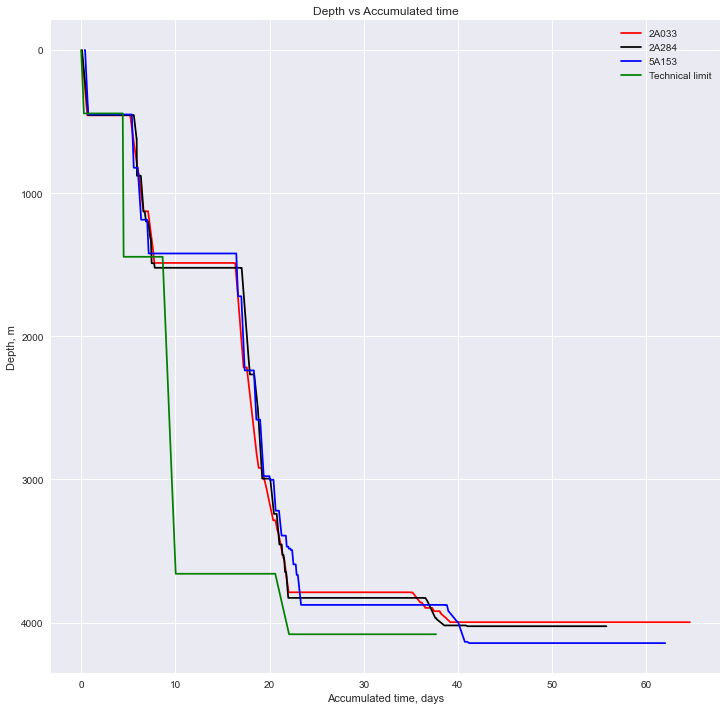

In [110]:
plot_wells(t,depth,well1,well4,well8)

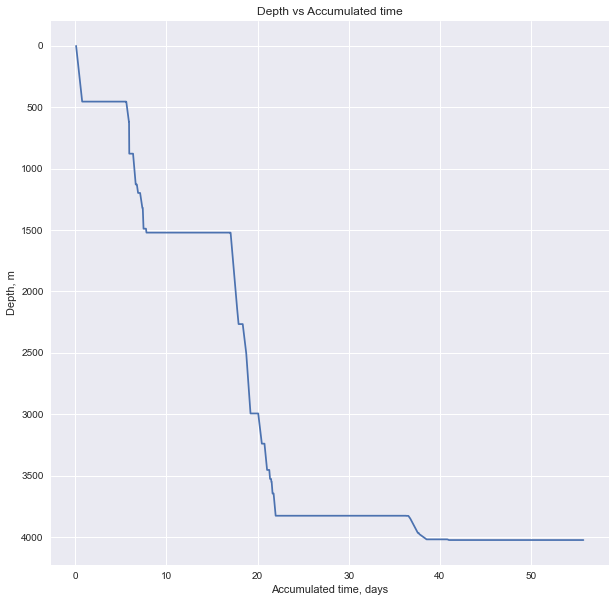

In [22]:
plot_well(well4)